In [1]:
# --- Setup ---
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import zipfile

In [2]:
# Option 1: Upload directly
from google.colab import files
uploaded = files.upload()

# This assumes you uploaded netflix.zip
zip_path = "/content/netflix.zip"

# Extract
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall("netflix_unzipped")

csv_path = "netflix_unzipped/netflix_titles.csv"

Saving netflix.zip to netflix (1).zip


In [3]:
# Load dataset
df = pd.read_csv(csv_path)

# --- Preprocessing ---
df['date_added_parsed'] = pd.to_datetime(df['date_added'], errors='coerce')
df['added_month'] = df['date_added_parsed'].dt.month_name()

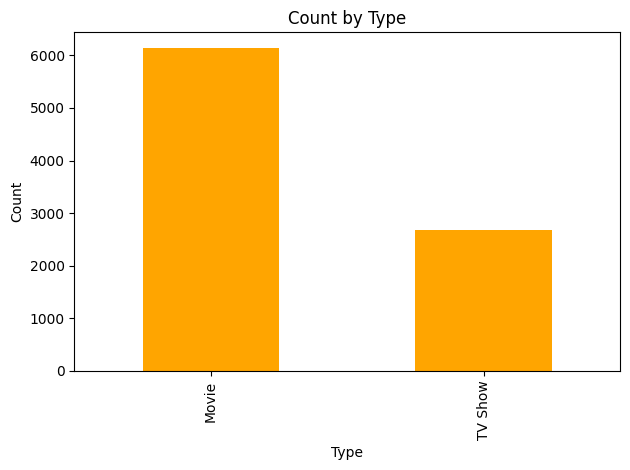

In [4]:
# --- Movies vs TV Shows ---
type_counts = df['type'].value_counts()

plt.figure()
type_counts.plot(kind='bar', color='orange')
plt.title('Count by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

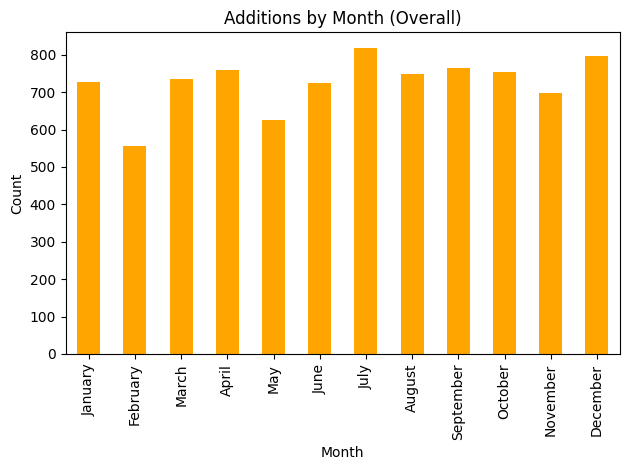

In [5]:
# --- Additions by Month (Overall) ---
monthly_counts = df['added_month'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]).fillna(0).astype(int)

plt.figure()
monthly_counts.plot(kind='bar', color='orange')
plt.title('Additions by Month (Overall)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

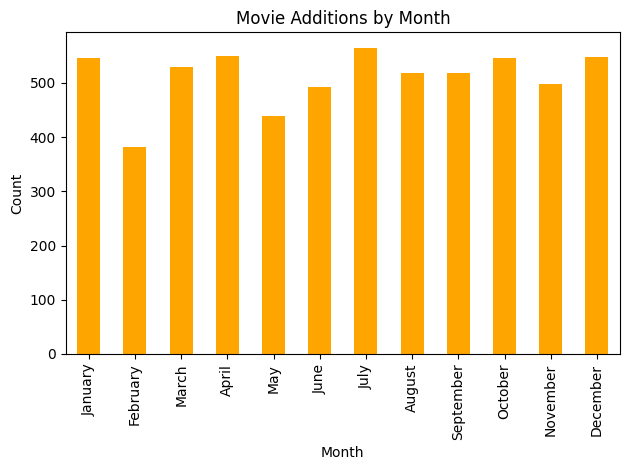

In [6]:
# --- Movie Additions by Month ---
movies = df[df['type'] == 'Movie'].copy()
movies_monthly = movies['added_month'].value_counts().reindex(monthly_counts.index).fillna(0).astype(int)

plt.figure()
movies_monthly.plot(kind='bar', color='orange')
plt.title('Movie Additions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

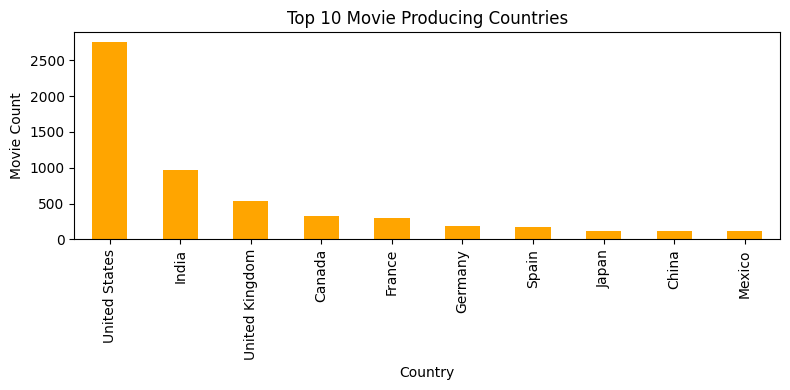

Total records: 8807
Movies: 6131
TV Shows: 2676
Best month for releasing movies: July with 565 movies

Top 10 producing countries:
           country  movie_count
0   United States         2752
1           India          962
2  United Kingdom          534
3          Canada          319
4          France          303
5         Germany          182
6           Spain          171
7           Japan          119
8           China          114
9          Mexico          111


In [7]:
# --- Top 10 Movie Producing Countries ---
def split_countries(x):
    if pd.isna(x):
        return []
    return [p.strip() for p in x.split(',') if p.strip()]

country_list = []
for c in movies['country'].dropna():
    country_list.extend(split_countries(c))

country_counts = Counter(country_list)
top10_countries = pd.DataFrame(country_counts.most_common(10), columns=['country','movie_count'])

plt.figure(figsize=(8,4))
top10_countries.set_index('country')['movie_count'].plot(kind='bar', color='orange')
plt.title('Top 10 Movie Producing Countries')
plt.xlabel('Country')
plt.ylabel('Movie Count')
plt.tight_layout()
plt.show()

# --- Summary ---
print("Total records:", len(df))
print("Movies:", int(type_counts.get('Movie', 0)))
print("TV Shows:", int(type_counts.get('TV Show', 0)))
print("Best month for releasing movies:", movies_monthly.idxmax(), "with", movies_monthly.max(), "movies")
print("\nTop 10 producing countries:\n", top10_countries)

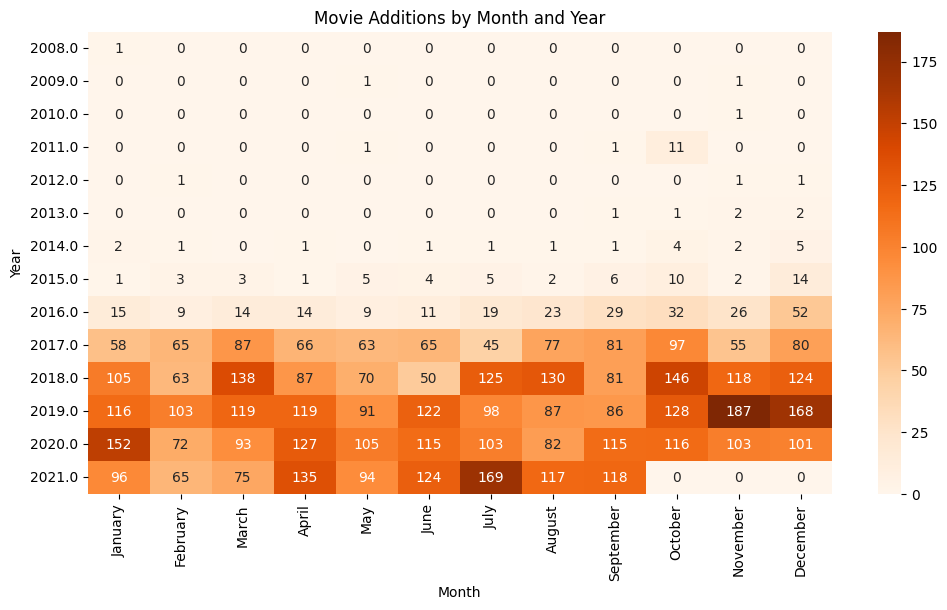

In [8]:
# --- Setup ---
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Parse dates
df['date_added_parsed'] = pd.to_datetime(df['date_added'], errors='coerce')
df['added_year'] = df['date_added_parsed'].dt.year
df['added_month'] = df['date_added_parsed'].dt.month_name()

# --- 1. Seasonal trends by year ---
movies = df[df['type'] == 'Movie'].copy()
monthly_by_year = movies.groupby(['added_year','added_month']).size().unstack(fill_value=0)

# Reorder months
months_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]
monthly_by_year = monthly_by_year.reindex(columns=months_order)

plt.figure(figsize=(12,6))
sns.heatmap(monthly_by_year, cmap="Oranges", annot=True, fmt="d")
plt.title("Movie Additions by Month and Year")
plt.ylabel("Year")
plt.xlabel("Month")
plt.show()

